In [33]:
import pandas as pd

df_small = pd.read_csv('data/small.csv')

df_small['diff'] = df_small['repub_percent_08'] - df_small['repub_percent_12']
df_small
'''Eğer diff daha önce yoksa, yeni bir sütun oluşturulur.
Eğer diff daha önce varsa, var olan sütunun değerleri güncellenir.'''

,state,county,repub_percent_08,repub_percent_12,diff
0,Texas,Red River,68.507522,69.944817,-1.437295
1,Texas,Walker,60.707197,64.971903,-4.264706
2,Kentucky,Powell,57.059533,61.727293,-4.667760
3,Texas,Schleicher,74.386503,77.384464,-2.997961
4,West Virginia,Morgan,60.857614,64.068711,-3.211097


In [34]:
df_small['abs_diff'] = df_small['diff'].abs()
df_small
'''
abs: Mutlak değerini alır
'''

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
0,Texas,Red River,68.507522,69.944817,-1.437295,1.437295
1,Texas,Walker,60.707197,64.971903,-4.264706,4.264706
2,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760
3,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961
4,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097


In [35]:
from scipy.stats import rankdata

df_small['rank_abs_diff'] = rankdata(df_small['abs_diff'])
df_small
'''
abs_diff sütunundaki değerleri sıralı bir şekilde derecelendirir.
Daha küçük bir değere daha küçük bir derece (rank) atanır.
Örneğin, abs_diff sütunu [5.2, 4.2, 0.0] gibi bir şeyse:
Sıralama şu şekilde olur: [3, 2, 1].
'''

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
0,Texas,Red River,68.507522,69.944817,-1.437295,1.437295,1.0
1,Texas,Walker,60.707197,64.971903,-4.264706,4.264706,4.0
2,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760,5.0
3,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961,2.0
4,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097,3.0


In [14]:
import numpy as np 

T_minus = 1 + 4 + 5 + 2 + 3  #->15
T_plus = 0  #0
W = np.min([T_minus, T_plus])
W
'''
np.min fonksiyonu, verilen liste içindeki en küçük değeri döndürür.
'''

0

In [36]:
alpha = 0.01
pingouin.wilcoxon(x=df_small['repub_percent_08'], 
                  y=df_small['repub_percent_12'], 
                  alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.72


Wilcoxon İşaretli Sıralar Testi?
Bu test, iki eşleştirilmiş veri kümesi arasındaki medyan farkı karşılaştırmak için kullanılır. Genelde, normal dağılıma uymayan verilere uygulanan non-parametrik bir testtir.

W-val: Wilcoxon test istatistiği (hesaplanan W değeri).
p-val: p-değeri, anlamlılık seviyesini kontrol etmek için kullanılır.
alternative: Hipotez tipi

Eğer p-değeri α değerinden küçükse (p<0.01), sıfır hipotezini reddedersiniz. Yani, 2008 yılı oy oranlarının medyanının 2012 yılına göre daha düşük olduğunu söyleyebilirsiniz.
Eğer p-değeri α değerinden büyükse (p>0.01), sıfır hipotezini reddetmezsiniz. Yani, bu iki yıl arasında anlamlı bir fark olmadığını düşünebilirsiniz.

alternative->
'two-sided': İki yönlü hipotez. Medyanlar arasında herhangi bir fark olup olmadığını test eder.
'greater': Tek yönlü hipotez. x medyanının y medyanından büyük olup olmadığını test eder.
'less': Tek yönlü hipotez. x medyanının y medyanından küçük olup olmadığını test eder.

In [37]:
import pandas as pd 
df_stck=pd.read_feather("data/stack_overflow.feather")

In [38]:
age_vs_comp = df_stck[['converted_comp', 'age_first_code_cut']]
age_vs_comp

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [39]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
age_vs_comp_wide
'''
pivot(), bir DataFrame'i satır, sütun ve hücre değerlerini yeniden düzenleyerek daha kolay analiz edilebilir bir tabloya dönüştürür.
columns: Hangi sütunun, sütun isimleri olarak kullanılacağını belirtir.
values: Yeni tabloya hangi sütundaki verilerin yerleştirileceğini belirtir.
'''

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [40]:
import pingouin

alpha = 0.01
#h0 hipotezi reddilir. anlamlı bir fark var 

pingouin.mwu(x=age_vs_comp_wide['child'], 
             y=age_vs_comp_wide['adult'], 
             alternative='greater')
'''
'greater' seçilmiş: Bu, x grubunun (çocukların maaşları) y grubundan (yetişkinlerin maaşlarından) daha büyük olup olmadığını test eder.
t-Testi, normal dağılım varsayar. Ancak veriler normal dağılmadığında veya örneklem boyutları küçük olduğunda,
Mann-Whitney U Testi gibi non-parametrik testler daha doğru sonuçlar verir.
'''
#non parametric t testi yaptık

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


pingouin.mwu() fonksiyonunu kullanarak Mann-Whitney U Testi (MWU) yapıyor. Bu, iki bağımsız veri grubu arasında anlamlı bir fark olup olmadığını test eden non-parametrik bir testtir.


In [41]:
#"Farklı iş tatmini seviyelerine sahip gruplar arasında maaşlarda anlamlı bir fark var mı?"

alpha = 0.01 #alpha = 0.01: %1 anlamlılık düzeyi belirlenmiş.
pingouin.kruskal(data=df_stck, dv='converted_comp', between='job_sat')

'''
dv :Test edilecek bağımlı değişkenin adı.
between :Gruplama yapılacak bağımsız değişken.

'''


,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


Kruskal-Wallis H Testi olarak bilinen non-parametrik bir testi gerçekleştiriyor. Kruskal-Wallis H testi, üç veya daha fazla bağımsız grup arasındaki ortanca (median) farklarının anlamlı olup olmadığını test etmek için kullanılır.

Kruskal-Wallis H Testi, bağımsız gruplar arasında dağılımlar arasında fark olup olmadığını test eden bir non-parametrik testtir.
ANOVA'nın (Varyans Analizi) non-parametrik versiyonudur ve verilerin normal dağılım varsayımını karşılamadığı durumlarda kullanılır.

Sınıflandırma: Etiketleri tahmin eder (ör. kategorik sınıflar).
Örnek: Bir e-postanın "spam" ya da "spam değil" olarak sınıflandırılması.

Regresyon: Sayısal değerleri tahmin eder.
Örnek: Bir evin fiyatını tahmin etmek.

preductor variable=Independent variable=giriş değişkenleri=ınput variable=   --->X(büyük X)
çıkış değişkeni=output variable=dependent variable=response variable=target variable --->y(küçük y)

Bağımsız Değişkenler (X): Giriş değişkenleri, modelin öğrenmesi için kullanılan veriler. Modelin öğrenmeye çalıştığı nedenler.
Bağımlı Değişken (y): Çıkış değişkeni, modelin tahmin etmeye çalıştığı sonuç. Modelin öğrenmeye çalıştığı sonuç.

Veri Setinin İkiye Ayrılması: Eğitim ve Test

-Eğitim (Train) Veri Seti
Amaç: Modelin öğrenme sürecinde kullanacağı veriyi sağlar.
Bu veri seti, modelin parametrelerini öğrenmesine yardımcı olur. Yani, model bu verilerle neye göre tahmin yapması gerektiğini öğrenir.
Eğitim verileri, bağımsız değişkenler (X) ve bağımlı değişken (y) içerir.
Örnek: Eğer bir ev fiyatı tahmin modeli kuruyorsanız, modeliniz bu veri setiyle evin özelliklerini (bağımsız değişkenler) ve fiyatını (bağımlı değişken) öğrenir.

-Test (Test) Veri Seti
Amaç: Modelin doğruluğunu değerlendirmek ve yeni veriler üzerinde ne kadar iyi performans gösterdiğini görmek.
Test verisi, modelin daha önce hiç görmediği veri ile test edilmesini sağlar. Bu, modelin genelleme yeteneğini ölçmek için önemlidir.
Test veri seti, modelin eğitimde öğrendiği bilgiyi doğru bir şekilde yeni verilere uygulayabilme kapasitesini sınar.
Örnek: Eğitim veri setinde model, evlerin büyüklüğü ve oda sayısı ile fiyatlar arasında ilişkiyi öğrenir. Test veri setinde, model bu ilişkiyi yeni evler için tahmin etmeye çalışır.

In [45]:
#  Using scikit-learn to fit a classifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values  #X, modelin öğrenmesi için kullanılacak bağımsız değişkenlerdir. Burada iki sütun seçilmiş:
y= df_churn['churn'].values #y, modelin tahmin etmeye çalışacağı bağımlı değişkendir

(X.shape, y.shape)
'''X.shape: X veri setinin boyutlarını verir, yani kaç satır (örnek) ve kaç sütun (özellik) olduğunu belirtir.
y.shape: y veri setinin boyutlarını verir, yani kaç etiket (target) olduğunu gösterir.
.values ifadesi, bu sütunları numpy array formatına dönüştürür.'''


((3333, 2), (3333,))

In [ ]:
giriş değişkeni=feauters

In [25]:
#KNeighborsClassifier kullanılarak bir model oluşturuldu.
#Model, X ve y verileri ile eğitildi.

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y)
'''
KNeighborsClassifier: scikit-learn kütüphanesinden bir sınıflandırma algoritmasıdır.
KNN, bir veri noktasını, komşularına en yakın olan sınıfa atar.
n_neighbors=15: Model, bir veri noktasını sınıflandırırken en yakın 15 komşuya bakar.
fit(X, y): Modeli eğitmek için kullanılan yöntemdir.
X: Özellikler (features), yani giriş değişkenleri.
y: Çıkış değişkeni (target), yani sınıflandırılmak istenen değer. 
'''

KNeighborsClassifier(n_neighbors=15)

In [26]:
# Predicting on unlabeled data
import numpy as np
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
X_new.shape #X_new verisinin boyutunu gösterir
'''
Her satır bir müşteri veya gözlem noktasını ifade eder.
Her sütun bir özelliği (feature) temsil eder.
[56.8, 17.5]: Bir müşterinin günlük ücreti (56.8) ve akşam ücreti (17.5).
'''

(3, 2)

In [27]:
predictions = model_knn.predict(X_new)
predictions
#predictions bir NumPy dizisidir ve her bir veri noktasının tahmin edilen sınıfını içerir.

array([1, 0, 0])

In [ ]:
metric-> model performansını hangi yöntemlere göre  değerlendirdin
Metric (ölçüt), makine öğrenimi modelinin performansını değerlendirmek için kullanılan bir ölçüm yöntemidir. 

In [28]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

#model eğitme
knn = KNeighborsClassifier(n_neighbors=6) #6 komşulu bir KNN modeli oluşturulur.
knn.fit(X_train, y_train) #Model, X_train (giriş) ve y_train (etiket) verileriyle eğitilir.
knn.score(X_test, y_test) #Test verisinde modelin doğruluk (accuracy) skorunu döndürür.


#verileri ikiye bölüyor rastgele bir şekilde
'''
Veriyi iki parçaya ayırır
Eğitim (Training) Verisi: Model bu veriyle öğrenir.
Test Verisi: Model bu veriyle test edilir (performansı ölçülür).
test_size=0.2: Verinin %20'si test, %80'i eğitim için ayrılır.
random_state=42: Rastgele bölmeyi kontrol eder, böylece sonuç her çalıştırmada aynı olur.
stratify=y: y'deki sınıf dağılımını hem eğitim hem test verilerinde korur

Kod, veriyi eğitim ve test olarak ikiye böler, bir KNN modeli oluşturur, modeli eğitim verisiyle eğitir ve test verisiyle doğruluk skorunu hesaplar.
'''

0.8605697151424287

Text(0, 0.5, 'Doğruluk')

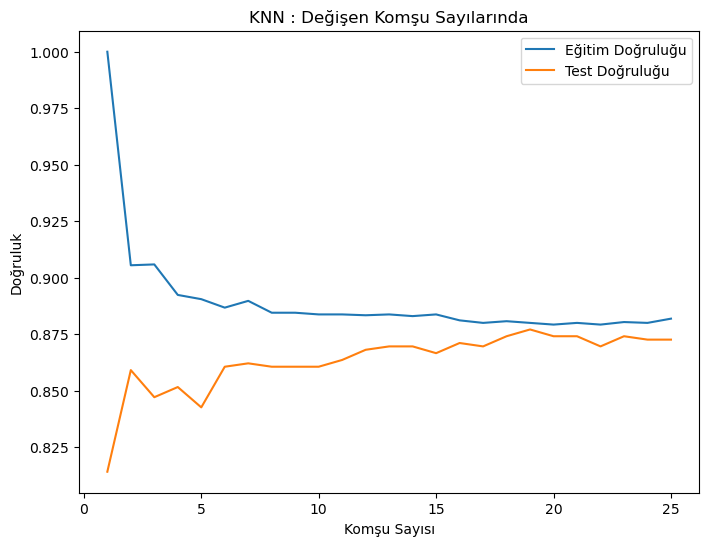

In [29]:
import matplotlib.pyplot as plt

train_accuracies = {}
test_accuracies = {}

neighbours = np.arange(1, 26)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    train_accuracies[neighbour] = knn.score(X_train, y_train)
    test_accuracies[neighbour] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title('KNN : Değişen Komşu Sayılarında')
plt.plot(neighbours, train_accuracies.values(), label='Eğitim Doğruluğu')
plt.plot(neighbours, test_accuracies.values(), label='Test Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')

np.arange(1, 26): Komşu sayısını 1'den 25'e kadar (dahil) test etmek için bir dizi oluşturuyor.
Komşu Sayısına Göre Döngü:

Her döngüde, farklı n_neighbors değerine sahip bir KNN modeli oluşturulur.
Model, X_train ve y_train verisiyle eğitilir.
Eğitim ve test doğruluğu hesaplanır ve ilgili sözlükte saklanır.
train_accuracies: Eğitim verisi üzerindeki doğruluk.
test_accuracies: Test verisi üzerindeki doğruluk.

plt.figure():
Yeni bir grafik (figure) oluşturur.
Bu grafik, içine birden fazla çizim (plot) yerleştirilebilir.
Grafik özelliklerini (örneğin boyut, çözünürlük) ayarlamak için kullanılır.

figsize=(8, 6):
Grafiğin boyutunu inç (inch) cinsinden belirler.
(genişlik, yükseklik) formatında bir tuple'dır.

plt.plot():
train_accuracies.values(): Eğitim doğruluk değerlerini çizer.
test_accuracies.values(): Test doğruluk değerlerini çizer.


In [47]:
#kan glikoz seviyelerinin tahmin edilmesi
import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')
df_diabets.head() #DataFrame'in ilk 5 satırını görüntüler.


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_filtered
#df_filtered, sadece bmi değeri 0.0 veya glucose değeri 0 olan satırları içeren yeni bir DataFrame olur.

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
371,0,118,64,23,89,0.0,1.731,21,0


In [49]:
df_diabets.drop(df_filtered.index, inplace=True)
df_diabets
'''
drop() fonksiyonu, bir DataFrame'den satır veya sütunları kaldırmak için kullanılır.
inplace=True: Veri setinde yapılan değişiklikler kalıcı olur.
'''

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
#creating feature and target arrays

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

(type(X), type(y)) #X ve y değişkenlerinin tiplerini kontrol etmek.
#type(X) → NumPy dizisi (numpy.ndarray) , type(y) → NumPy dizisi 

'''
.values :Bu ifade, pandas DataFrame'ini bir NumPy dizisine (ndarray) dönüştürür.
axis=1 → Sütunları hedefler, bu yüzden glucose gibi bir sütun çıkartılabilir.
axis=0 → Satırları hedefler,
X (Features): Modelin tahmin için kullanacağı bağımsız değişkenler.
y (Target): Modelin tahmin etmeye çalışacağı bağımlı değişken.
'''

(numpy.ndarray, numpy.ndarray)

In [52]:
#making predictions from a single feature
X_bmi = X[: ,4]
(X_bmi.shape , y.shape) #(X_bmi dizisinin boyutunu kontrol etmek. X_bmi: Bu, tek bir özellikten oluştuğu için 1D NumPy dizisi olur.,Hedef değişken olan y dizisinin boyutunu kontrol etmek.)
'''
X[:, 4] -> : Tüm satırları seç.
4: Sadece 4. sütunu seç.
'''

((752,), (752,))

X_bmi = X[:, 4].reshape(-1, 1)  ->1D diziyi 2D'ye dönüştür
(3, 1)  -> 3 satır ve 1 sütundan oluşan bir matris

In [53]:
#Bu y için iyidir, ancak özelliklerimizin scikit-learn tarafından kabul edilmesi için
#iki boutlu bir dizi olarak biçimlendirilmesi gerekir
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(752, 1)

Scikit-learn'de, makine öğrenimi modellerine girdi olarak özelliklerin (features) mutlaka 2D bir dizi (array) olması gerekir.
Eğer özelliklerimiz (ör. X_bmi) yalnızca tek bir sütundan oluşuyorsa (ör. BMI), bu sütunu 2D bir diziye dönüştürmek gerekir. Aksi takdirde, Scikit-learn bir hata verir çünkü 1D dizileri kabul etmez.

reshape() nedir?
NumPy'da kullanılan bir yöntemdir. Bir dizinin boyutlarını (şeklini) yeniden düzenler.
-1: NumPy burada satır sayısını otomatik olarak hesaplar.
1: Bu, sütun sayısını ifade eder. Burada 1 yazıldığı için dizimiz tek bir sütundan oluşur.

X_bmi.shape?
Bu, bir dizinin boyutlarını gösteren bir özelliktir.
Sonuç: (satır sayısı, sütun sayısı)

Text(0.5, 0, 'Body Mass Index')

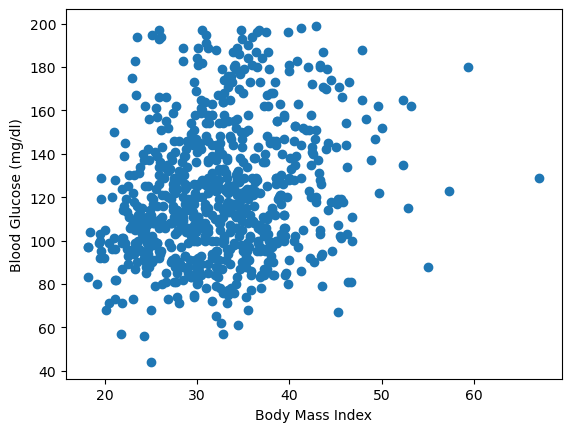

In [55]:
#plotting glucose vs. body mass index
import matplotlib.pyplot as plt

plt.scatter(X_bmi,y) #plt.scatter(), bir dağılım grafiği (scatter plot) oluşturur.
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

#genel olarak vücut kitle indeksi arttıkça kan glikoz seviyelerinin de artma eğiliminde olduğunu görebiliriz

Text(0.5, 0, 'Body Mass Index')

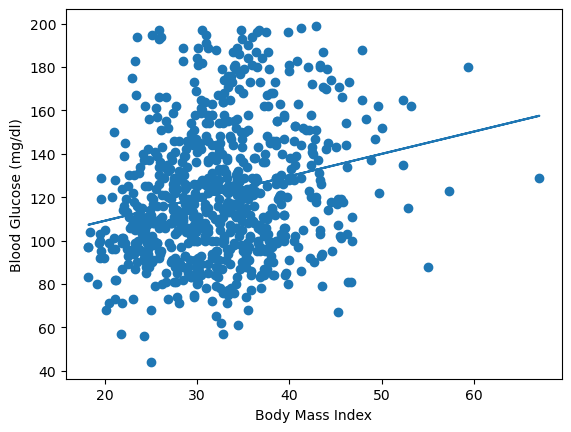

In [54]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_bmi, y)

predictions = model_reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

LinearRegression():
Scikit-learn'den bir doğrusal regresyon modeli tanımlanıyor.
Bu model, verilerdeki bağımlı değişken (y - Blood Glucose) ile bağımsız değişken (X_bmi - BMI) arasındaki doğrusal ilişkiyi öğrenir.

fit(X_bmi, y):
Modeli BMI verileri (X_bmi) ve kan glikoz seviyeleri (y) ile eğitiyor.
Amaç: Veriler arasında bir doğrusal ilişkiyi öğrenmek ve bir regresyon doğrusu oluşturmak.

predict(X_bmi):
Eğitim verileri (X_bmi) kullanılarak kan glikoz seviyesi tahminleri yapılıyor.
predictions: Tahmin edilen kan glikoz seviyeleri.
Bu değerler, regresyon doğrusu üzerindeki noktaları temsil eder.

plt.scatter(X_bmi, y) ->Dağılım grafiği ile çiziliyor.

plt.plot():
Bu, regresyon doğrusu çizmek için kullanılır.



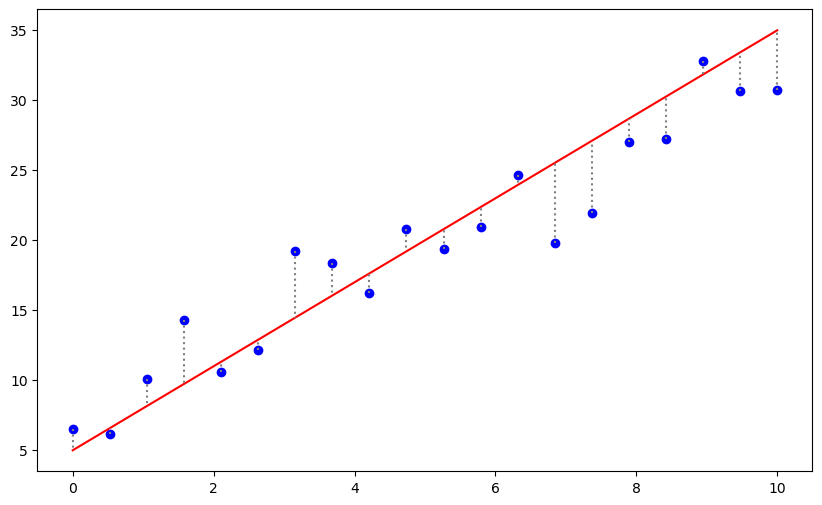

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data for the scatter plot
np.random.seed(42)
X = np.linspace(0,10,20)
Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))

# Fit a line (y = mx + c) manually
m = 3  # slope
c = 5  # intercept
Y_fit = m * X + c

# Calculate residuals (vertical distances between points and the line)
residuals = Y - Y_fit

# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')

# Add vertical lines to represent residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')


######sınavda sorabilir

NumPy: Sayısal hesaplamalar ve rastgele veri üretimi için kullanılır.
Matplotlib: Veri görselleştirme için kullanılan bir kütüphane.

np.random.seed(42): Rastgele sayı üreticisini sabitler. Bu, kodun her çalıştırıldığında aynı rastgele verileri üretmesini sağlar.
np.linspace(0, 10, 20): 0 ile 10 arasında eşit aralıklarla 20 tane nokta oluşturur. Bu, X eksenindeki değerlerdir.
Doğrusal bir fonksiyon y=3x+5 oluşturulur.Rastgele bir hata payı eklemek için normal dağılımlı rastgele değerler eklenir

 Doğrusal Modelin Manuel Olarak Tanımlanması
m: Eğimi (3) temsil eder.
c: Y eksenini kestiği noktayı (5) temsil eder.
y=3x+5 fonksiyonu hesaplanarak doğrusal bir model tanımlanır.

Rezidüel (Residual):
Bir veri noktasının modelden olan uzaklığıdır.
Matematiksel olarak: residual= y gercek − y model
Kodda, Y gerçek değerlerdir, Y_fit ise doğrusal modelin tahmin ettiği değerlerdir.

figsize=(10, 6): Grafiğin boyutunu ayarlar (10 birim genişlik, 6 birim yükseklik).
linestyle='dotted':Çizgiler noktalı bir biçimde çizilir.

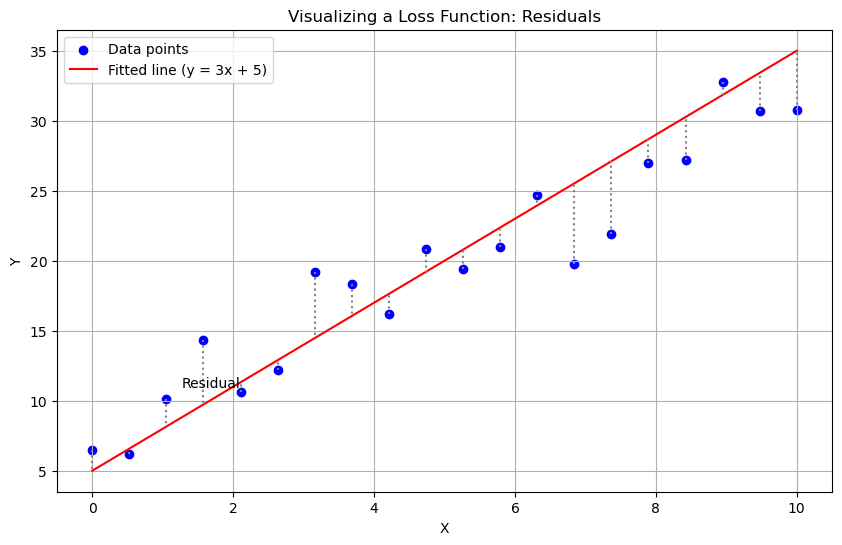

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the scatter plot
np.random.seed(42)
X = np.linspace(0, 10, 20)
Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))

# Fit a line (y = mx + c) manually
m = 3  # slope
c = 5  # intercept
Y_fit = m * X + c

# Calculate residuals (vertical distances between points and the line)
residuals = Y - Y_fit

# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')

# Add vertical lines to represent residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')
    if i == 4:  # Add a label to one residual line
        plt.text(X[i], (Y[i] + Y_fit[i]) / 2, 'Residual', color='black', fontsize=10, ha='right')

# Customize the plot
plt.title('Visualizing a Loss Function: Residuals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Rezidüellerin Görselleştirilmesi: Veri ve modelin uyuşmadığı yerleri anlamak için kullanılır.
Doğrusal Regresyonun Görsel Analizi: Gerçek değerler ile tahmin edilen değerlerin uyumunu kontrol etmek.
Tek değişkenli regresyon, sadece bir özellik (giriş değişkeni) kullanarak hedefi tahmin eder. Genellikle doğrusal bir ilişki (lineer ilişki) varsayılır, yani model y=mx+c şeklindedir.
Çoklu regresyon, birden fazla özellik kullanarak hedefi tahmin eder (x1,x2,x3 ün olduğu)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)


X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values


X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)


model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)
'''
Diyabet veri kümesindeki tüm özellikleri kullanarak kan şekeri seviyelerini tahmin etmek için doğrusal regresyon gerçekleştirelim. 
LinearRegression'ı sklearn-dot-linear_model'den içe aktarıyoruz. Ardından verileri eğitim ve test kümelerine ayırıyoruz, modeli 
örneklendiriyoruz, eğitim kümesine yerleştiriyoruz ve test kümesinde tahmin ediyoruz. 
Scikit-learn'deki doğrusal regresyonun kaputun altında OLS gerçekleştirdiğini unutmayın. 
'''
#test_size=0.2 parametresi, verilerin %20'ini test kümesi olarak ayırır.
#LinearRegression() sınıfı, doğrusal regresyon modelini oluşturur.
'''
OLS (Ordinary Least Squares), doğrusal regresyonun altında çalışan temel yöntemdir. Bu, veri noktalarına en iyi uyum sağlayan doğrusal bir çizgi bulma amacını taşır.
'''

"\nDiyabet veri kümesindeki tüm özellikleri kullanarak kan şekeri seviyelerini tahmin etmek için doğrusal regresyon gerçekleştirelim. \nLinearRegression'ı sklearn-dot-linear_model'den içe aktarıyoruz. Ardından verileri eğitim ve test kümelerine ayırıyoruz, modeli \nörneklendiriyoruz, eğitim kümesine yerleştiriyoruz ve test kümesinde tahmin ediyoruz. \nScikit-learn'deki doğrusal regresyonun kaputun altında OLS gerçekleştirdiğini unutmayın. \n"

In [61]:
# R- squared in scikit-learn
model_reg.score(X_test, y_test)
'''
model_reg.score(X_test, y_test) komutu, test verisi üzerinden R-squared değerini hesaplar ve modelin başarısını ölçer.
Bu değer, modelin açıklayıcı gücünü ve doğruluğunu gösteren önemli bir metriktir.
'''

0.3282802627263197

R-Squared (R²) Nedir?
R-squared (R²), modelin açıklayıcı gücünü gösteren bir istatistiktir ve 0 ile 1 arasında bir değer alır.
R² değeri, bağımlı değişkenin (yani hedef değişkenin, burada kan şekeri y_test) model tarafından ne kadar iyi tahmin edildiğini gösterir.
R² = 1, modelin verileri mükemmel bir şekilde tahmin ettiğini, R² = 0 ise modelin hiç açıklayıcı gücü olmadığını gösterir.
R², modelin doğrusal regresyon kullanarak veri setindeki varyansın ne kadarını açıkladığını gösterir.

In [62]:
model_reg.intercept_
#model_reg.intercept_ komutu, doğrusal regresyon modelindeki intercept değerini döndürür, yani doğrusal doğrunun y eksenini kestiği noktayı verir.

75.72429261281252

In [63]:
model_reg.coef_
#model_reg.coef_ komutu, doğrusal regresyon modelindeki her bir bağımsız değişkenin katsayısını (eğimi) döndürür. Bu katsayılar, her bir özellik için hedef değişkenin nasıl etkilendiğini gösterir.

array([-0.32654116,  0.14686555, -0.27590315,  0.08606826,  0.36160446,
        1.8382773 ,  0.42185562, 25.08247323])

In [64]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)
#Gerçek değerler (y_test) ile tahmin edilen değerler (y_pred) arasındaki kare hatanın ortalamasını hesaplar.

25.695203763480208